# Import libraries and modules

In [ ]:
!pip install tensorflow==2.16.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.7/590.7 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 123.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: ml-dtypes
    

In [ ]:
import os # Working with the operating system (files, environment variables)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Reducing the level of TensorFlow logs
import warnings # Monitoring warnings
warnings.filterwarnings('ignore') # Ignoring warnings
import numpy as np # Mathematical operations and working with arrays
import kagglehub # Access to Kaggle models and datasets
import matplotlib. pyplot as plt # Data visualization (graphs)
import pandas as pd # Analysis and processing of tabular data
import seaborn as sns # Statistical visualization (more beautiful graphs)
import plotly.graph_objects as go # Interactive visualization
import re # Regular expressions for working with text
import tensorflow as tf # Framework for machine learning
from tensorflow.keras.applications.inception_v3 import InceptionV3 # Ready CNN model
from tensorflow.keras.preprocessing.image import img_to_array, load_img # Image processing
from tensorflow.keras.preprocessing.text import Tokenizer # Tokenization of text
from tensorflow.keras.preprocessing. sequence import pad_sequences # Sequence alignment
from tensorflow.keras.utils import to_categorical, plot_model # Utilities (one-hot, model visualization)
from tensorflow.keras.models import Model, load_model # Create and load models
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, add # Neural network layers
from tensorflow. keras.layers import Flatten, Dropout, BatchNormalization # Additional layers
from tensorflow.keras.optimizers import Adam # Optimizer
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler # Callbacks for training
from sklearn.model_selection import train_test_split # Split data into train/test
from nltk. translate.bleu_score import corpus_bleu # Text quality score (BLEU score)
from PIL import Image # Work with images (Pillow)
from tqdm.notebook import tqdm_notebook # Jupyter runtime indicator
from collections import Counter # Item frequency counting

# Data preprocessing

In [ ]:
adityajn105_flickr8k_path = kagglehub.dataset_download('adityajn105/flickr8k')

print('Data source import complete.')

Data source import complete.


In [ ]:
# Path to the pictures
images_directory = '/kaggle/input/flickr8k/Images/'
# Path to tags
captions_path = '/kaggle/input/flickr8k/captions.txt'

In [ ]:
def load_captions(file_path):
    with open(file_path, 'r') as f:
        captions = f.readlines()
        # Labels to lower case
        captions = [caption.lower() for caption in captions[1:]]
    return captions

def tokenize_captions(captions):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(captions)
    return tokenizer

# Loading labels from a dataset
captions = load_captions(captions_path)
captions[:15:3]

['1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set of stairs in an entry way .\n',
 '1000268201_693b08cb0e.jpg,a little girl climbing the stairs to her playhouse .\n',
 '1001773457_577c3a7d70.jpg,a black dog and a tri-colored dog playing with each other on the road .\n',
 '1001773457_577c3a7d70.jpg,two dogs on pavement moving toward each other .\n',
 '1002674143_1b742ab4b8.jpg,a small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .\n']

# Clearing marks

In [ ]:
def clean_text(text):
    # Removing special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Removing of digits
    text = re.sub(r'\d+', '', text)

    # Removing unnecessary spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Tag cleaning
cleaned_captions = [clean_text(caption.split(',')[1]) for caption in captions]
cleaned_captions[:15:2]

['a child in a pink dress is climbing up a set of stairs in an entry way',
 'a little girl climbing into a wooden playhouse',
 'a little girl in a pink dress going into a wooden cabin',
 'a black dog and a tricolored dog playing with each other on the road',
 'two dogs of different breeds looking at each other on the road',
 'a little girl covered in paint sits in front of a painted rainbow with her hands in a bowl',
 'a small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it',
 'young girl with pigtails painting outside in the grass']

In [ ]:
# Image ID + \t + Caption
captions_IDs = []
for i in range(len(cleaned_captions)):
    # 'start' and 'end'
    item = captions[i].split(',')[0]+'\t'+'start '+cleaned_captions[i]+' end\n'
    captions_IDs.append(item)

captions_IDs[:20:3], len(captions_IDs)

(['1000268201_693b08cb0e.jpg\tstart a child in a pink dress is climbing up a set of stairs in an entry way end\n',
  '1000268201_693b08cb0e.jpg\tstart a little girl climbing the stairs to her playhouse end\n',
  '1001773457_577c3a7d70.jpg\tstart a black dog and a tricolored dog playing with each other on the road end\n',
  '1001773457_577c3a7d70.jpg\tstart two dogs on pavement moving toward each other end\n',
  '1002674143_1b742ab4b8.jpg\tstart a small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it end\n',
  '1003163366_44323f5815.jpg\tstart a man lays on a bench while his dog sits by him end\n',
  '1003163366_44323f5815.jpg\tstart a shirtless man lies on a park bench with his dog end\n'],
 40455)

# Image visualization

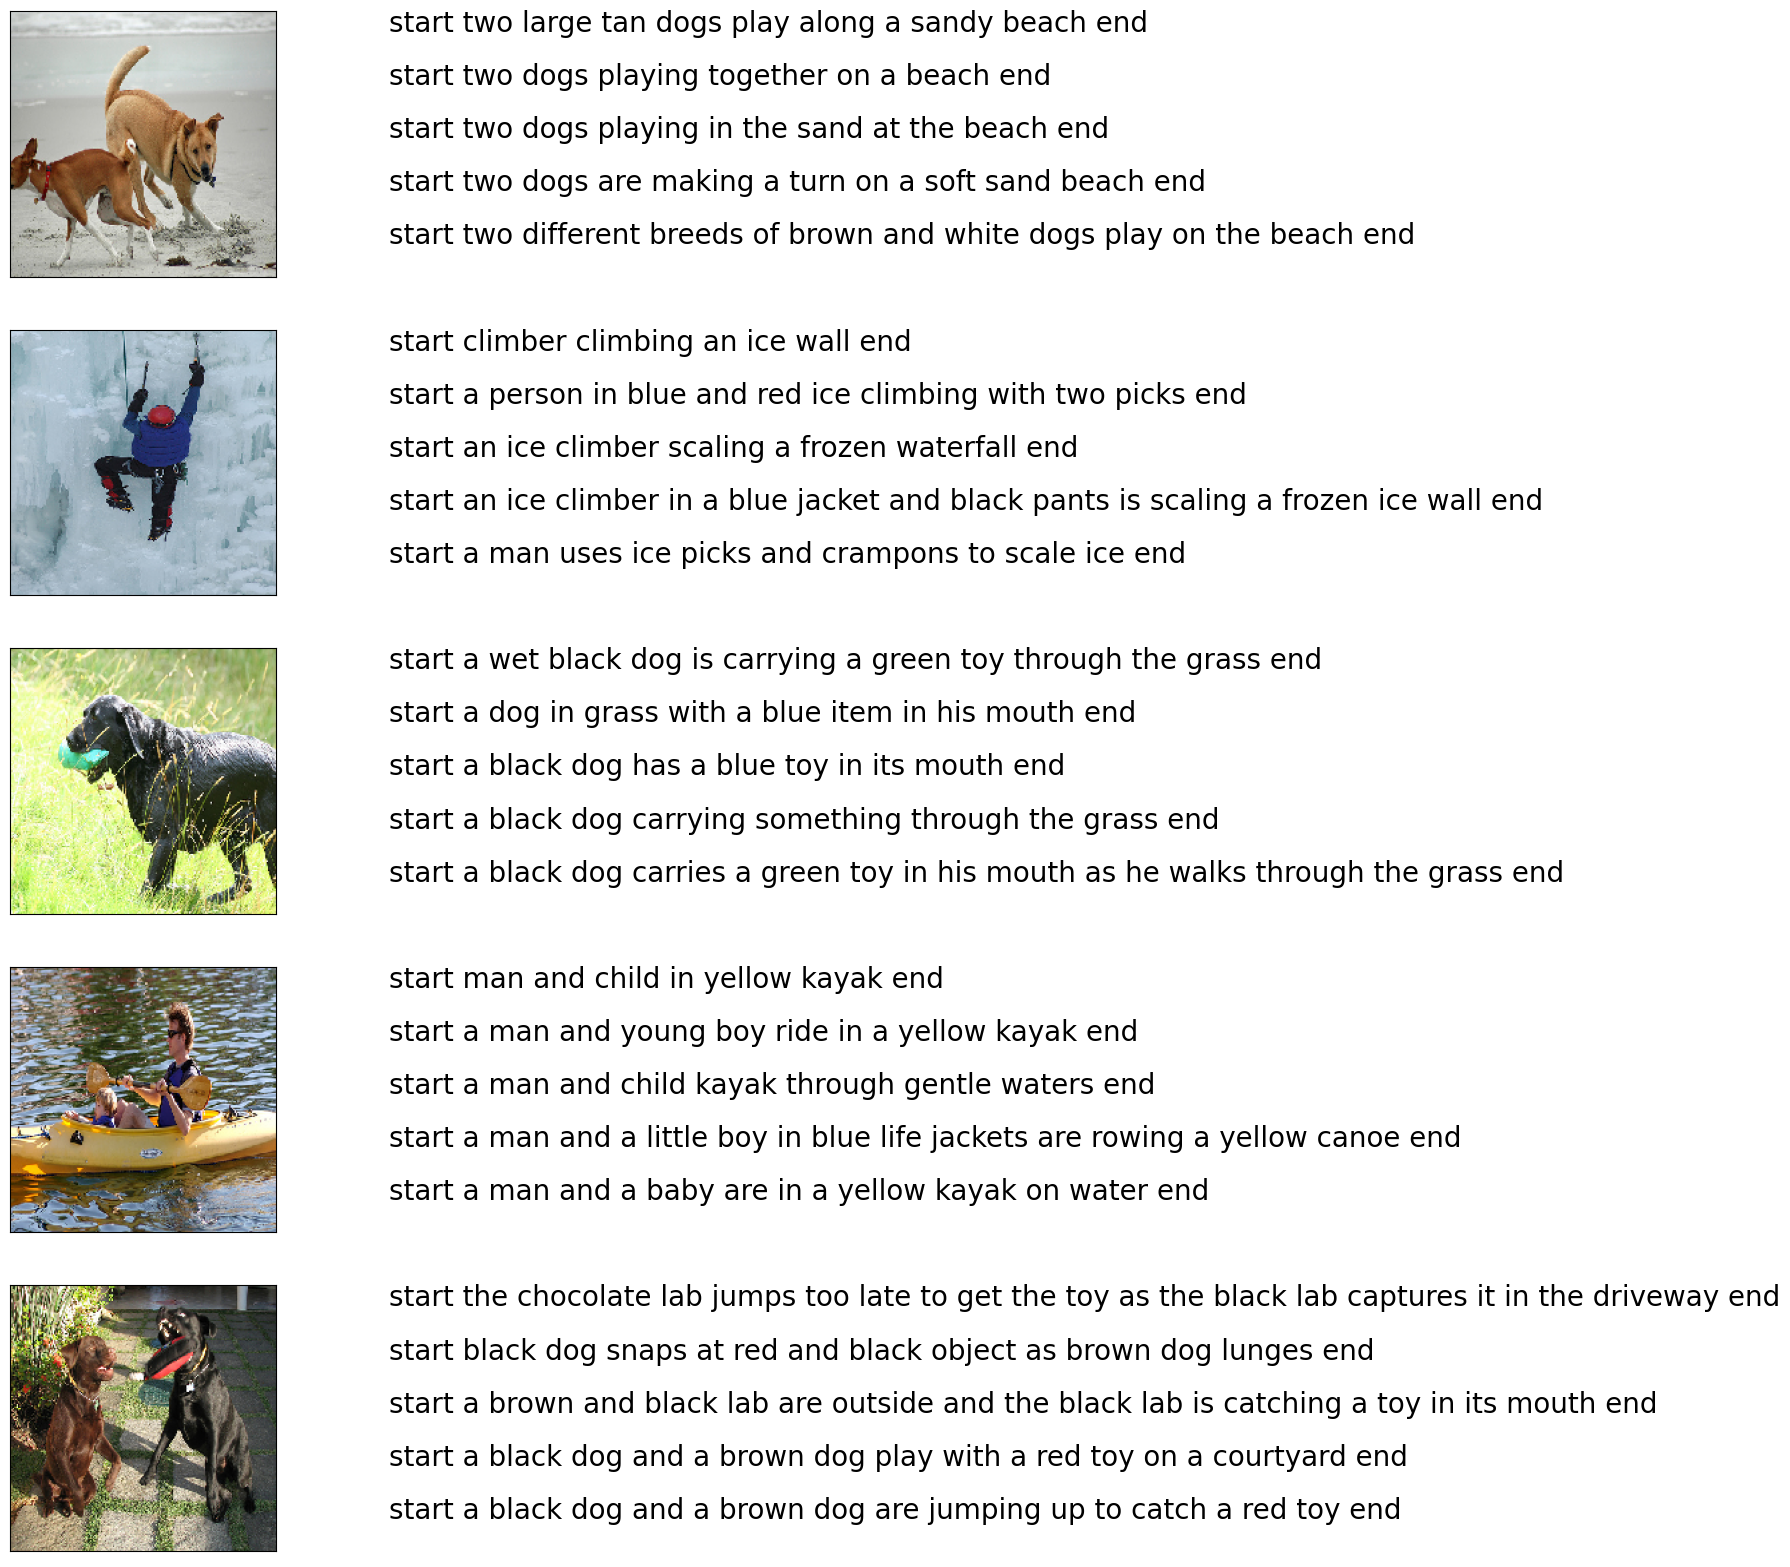

In [ ]:
def visualization(data, num_of_images):
    # We use dictionaries to access the captions of each image by its ID
    captions_dictionary = {}
    for item in data[100:100+(num_of_images)*5]:
        image_id, caption = item.split('\t')
        if image_id not in captions_dictionary:
            captions_dictionary[image_id] = []
        captions_dictionary[image_id].append(caption)
    else:
        list_captions = [x for x in captions_dictionary.items()]

    count = 1
    fig = plt.figure(figsize=(10,20))
    for filename in list(captions_dictionary.keys()):
        captions = captions_dictionary[filename]
        image_load = load_img(images_directory+filename, target_size=(199,199,3))

        ax = fig.add_subplot(num_of_images,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        count += 1

        ax = fig.add_subplot(num_of_images,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,len(captions))
        for i, caption in enumerate(captions):
            ax.text(0,i,caption,fontsize=20)
        count += 1
    plt.show()

visualization(captions_IDs, 5)

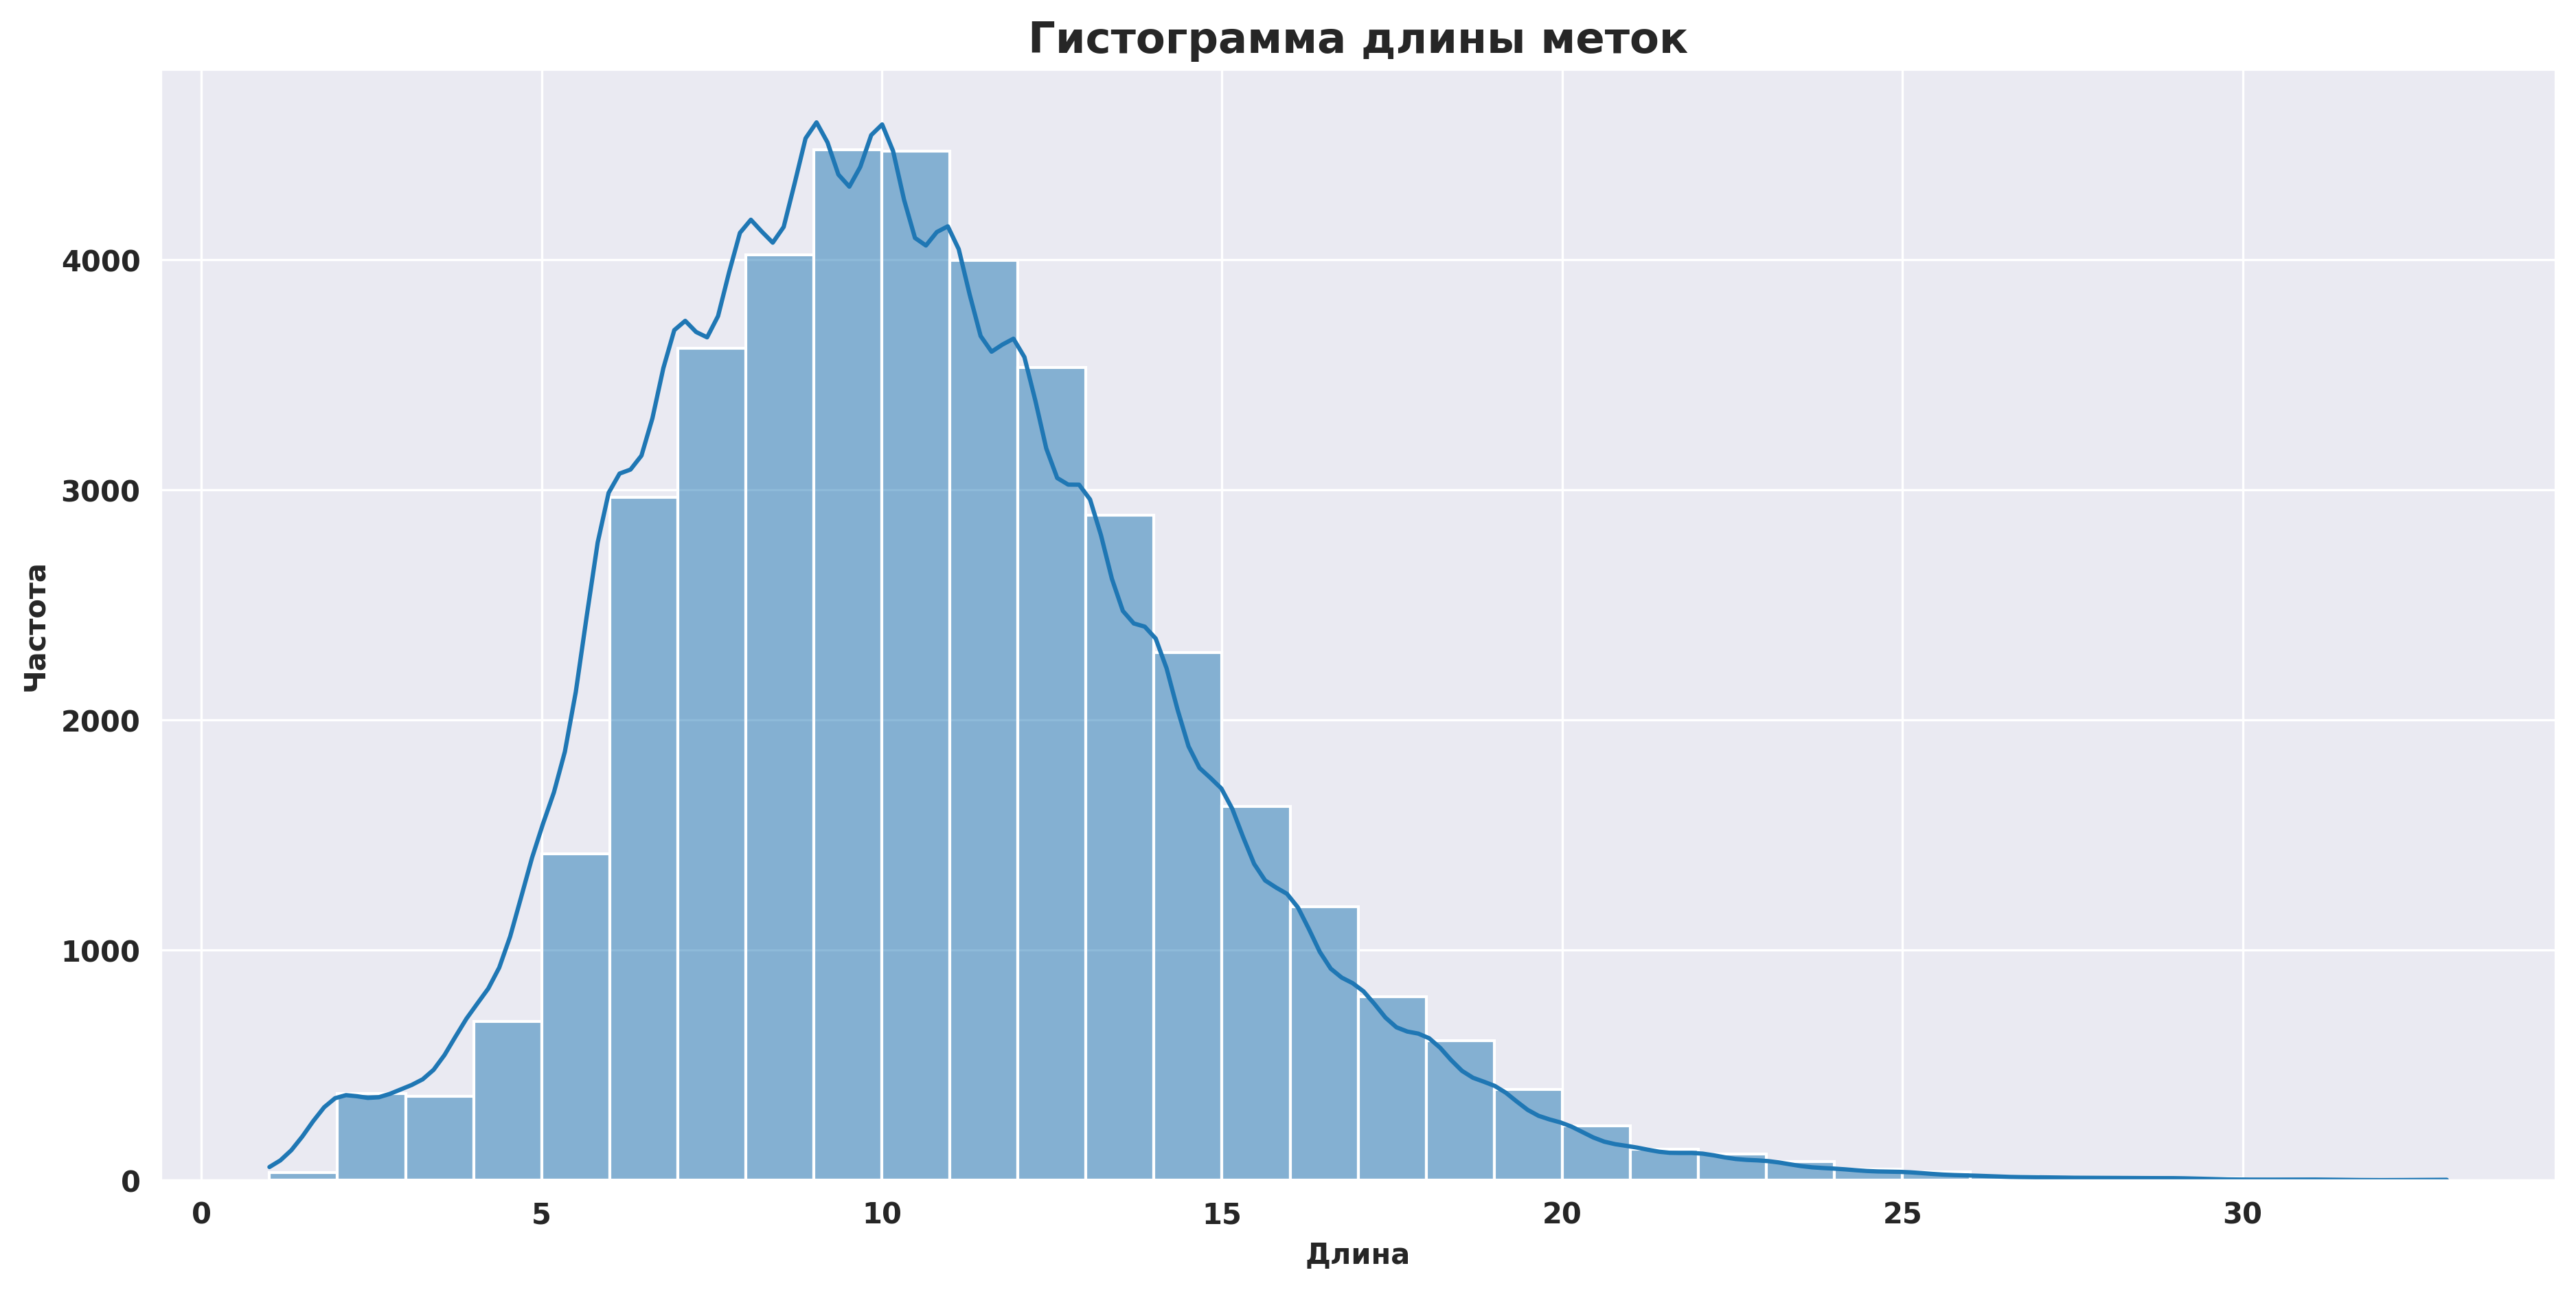

In [ ]:
def captions_length(data):
    plt.figure(figsize=(15, 7), dpi=300)
    sns.set_style('darkgrid')
    sns.histplot(x=[len(x.split(' ')) for x in data], kde=True, binwidth=1)
    plt.title('Label length histogram', fontsize=15, fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.xlabel('Length', fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')
    plt.show()

captions_length(cleaned_captions)

In [ ]:
def word_occurrences(data):
    # Combining all sentences into one line
    all_text = ' '.join(data)
    # Split text into words and count repetitions
    word_counts = Counter(all_text.split())

    words = list(word_counts.keys())[1:30]
    values = list(word_counts.values())[1:30]
    # Normalize values
    normalized_values = np.array(values) / np.max(values)
    colors = np.array(['rgba(30, 58, 138, {})'.format(0.4 + 0.5 * (value)) for value in normalized_values])

    fig = go.Figure(data=[go.Pie(labels=words, values=values, hole=.6, marker=dict(colors=colors), textinfo='label')])

    fig.update_layout(title_text='Appearance of words in labels (except for the letter\'a\')', title_font=dict(size=23, family='Balto'))

    fig.show()

word_occurrences(cleaned_captions)

# Tokenization of tags and setting the dictionary size

In [ ]:
tokenizer = tokenize_captions(cleaned_captions)
vocab_size = len(tokenizer.word_index) + 1
vocab_size

8586

# Split the data into training, validation and test samples

In [ ]:
# Storing image IDs
all_image_ids = os.listdir(images_directory)

# Separate image IDs
train_image_ids, val_image_ids = train_test_split(all_image_ids, test_size=0.15, random_state=42)
val_image_ids, test_image_ids = train_test_split(val_image_ids, test_size=0.1, random_state=42)

train_captions, val_captions, test_captions = [], [], []
for caption in captions_IDs:
    image_id, _ = caption.split('\t')

    if image_id in train_image_ids:
        train_captions.append(caption)

    elif image_id in val_image_ids:
        val_captions.append(caption)

    elif image_id in test_image_ids:
        test_captions.append(caption)

    else:
        print('Unknown image ID!')

train_captions[0], val_captions[0], test_captions[0], len(train_captions)/5, len(val_captions)/5, len(test_captions)/5

('1000268201_693b08cb0e.jpg\tstart a child in a pink dress is climbing up a set of stairs in an entry way end\n',
 '1001773457_577c3a7d70.jpg\tstart a black dog and a spotted dog are fighting end\n',
 '1042590306_95dea0916c.jpg\tstart a man and woman pose for the camera while another man looks on end\n',
 6877.0,
 1092.0,
 122.0)

# Image feature extraction using the InceptionV3 model

In [ ]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(299, 299))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img

def extract_image_features(model, image_path):
    img = preprocess_image(image_path)
    features = model.predict(img, verbose=0)
    return features

# Loading the pre-trained InceptionV3 model
inception_v3_model = InceptionV3(weights = 'imagenet', input_shape=(299, 299, 3))
inception_v3_model.layers.pop()
inception_v3_model = Model(inputs=inception_v3_model.inputs, outputs=inception_v3_model.layers[-2].output)

In [ ]:
train_image_features, val_image_features, test_image_features = {}, {}, {} # Dictionary for storing image features with corresponding identifiers

pbar = tqdm_notebook(total=len(all_image_ids), position=0, leave=True, colour='green')

for caption in all_image_ids:
    image_id = caption.split('\t')[0]
    image_path = os.path.join(images_directory, image_id)
    image_features = extract_image_features(inception_v3_model, image_path) # Feature extraction

    if image_id in train_image_ids:
        train_image_features[image_id] = image_features.flatten() # Feature smoothing
        pbar.update(1)

    elif image_id in val_image_ids:
        val_image_features[image_id] = image_features.flatten() # Feature smoothing
        pbar.update(1)

    elif image_id in test_image_ids:
        test_image_features[image_id] = image_features.flatten() # Feature smoothing
        pbar.update(1)

    else:
        print('Unknown image ID!')

pbar.close()

# Preparing data for model input

We use generators to collect data to optimize memory usage.

In [ ]:
def data_generator(captions, image_features, tokenizer, max_caption_length, batch_size):
    num_samples = len(captions)
    image_ids = list(image_features.keys())

    while True:
        # Перемешиваем данные для каждой эпохи
        indices = np.arange(num_samples)
        np.random.shuffle(indices)

        for start_idx in range(0, num_samples, batch_size):
            batch_indices = indices[start_idx:start_idx + batch_size]
            X_images, X_captions, y = [], [], []

            for idx in batch_indices:
                image_id, caption_text = captions[idx].split('\t')
                caption_text = caption_text.rstrip('\n')

                # Tokenization and sequence creation
                seq = tokenizer.texts_to_sequences([caption_text])[0]

                # Creating learning pairs (X, y)
                for i in range(1, len(seq)):
                    in_seq = seq[:i]
                    out_seq = seq[i]

                    # Padding and one-hot coding
                    in_seq = pad_sequences([in_seq], maxlen=max_caption_length)[0]
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                    X_images.append(image_features[image_id])
                    X_captions.append(in_seq)
                    y.append(out_seq)

            # Convert regular shaped arrays to numpy
            X_images_arr = np.array(X_images)
            X_captions_arr = np.array(X_captions)
            y_arr = np.array(y)

            yield (X_images_arr, X_captions_arr), y_arr

In [ ]:
# Determining the maximum length of labels
max_caption_length = max(len(caption.split()) for caption in cleaned_captions) + 1

# Define CNN output dimension (size of feature vector from InceptionV3)
cnn_output_dim = inception_v3_model.output_shape[1] # 2048

# Define batch sizes
batch_size_train = 270
batch_size_val = 150

# Create data generators for training and testing
train_data_generator = data_generator(train_captions, train_image_features, tokenizer, max_caption_length, batch_size_train)
val_data_generator = data_generator(val_captions, val_image_features, tokenizer, max_caption_length, batch_size_val)

In [ ]:
# Checking dimensions
sample_batch = next(train_data_generator)
print("Training sample batch shapes:")
print("X_images:", sample_batch[0][0].shape)
print("X_captions:", sample_batch[0][1].shape)
print("y:", sample_batch[1].shape)
print('=========================')
sample_batch = next(val_data_generator)
print("Validation sample batch shapes:")
print("X_images:", sample_batch[0][0].shape)
print("X_captions:", sample_batch[0][1].shape)
print("y:", sample_batch[1].shape)

Training sample batch shapes:
X_images: (2960, 2048)
X_captions: (2960, 34)
y: (2960, 8586)
Validation sample batch shapes:
X_images: (1698, 2048)
X_captions: (1698, 34)
y: (1698, 8586)


# Model Architecture

### **Encoder** (image attributes)
* Input Layer
* Batch Normalization Layer
* Dense Layer
* Batch Normalization Layer

### **Decoder** (tags)
* Input Layer
* Embedding Layer
* LSTM Layer

### **Output**
* Add Layer (Encoder output + Decoder output)
* Dense Layer + ReLU activation function
* Dense Layer + Softmax activation function

In [ ]:
def build_model(vocab_size, max_caption_length, cnn_output_dim):
    # Encoder Model
    input_image = Input(shape=(cnn_output_dim,), name='Features_Input')
    fe1 = BatchNormalization()(input_image)
    fe2 = Dense(256, activation='relu')(fe1) # Adding a Dense layer to the CNN output to match the decoder output size
    fe3 = BatchNormalization()(fe2)

    # Decoder Model
    input_caption = Input(shape=(max_caption_length,), name='Sequence_Input')
    se1 = Embedding(vocab_size, 256, mask_zero=True)(input_caption)
    se2 = LSTM(256)(se1)

    # Output
    decoder1 = add([fe3, se2])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax', name='Output_Layer')(decoder2)

    # Returning The Model
    model = Model(inputs=[input_image, input_caption], outputs=outputs, name='Image_Captioning')
    return model

caption_model = build_model(vocab_size, max_caption_length, cnn_output_dim)

optimizer = Adam(learning_rate=0.01, clipnorm=1.0)
caption_model.compile(loss='categorical_crossentropy', optimizer=optimizer)

caption_model.summary()

Model: "Image_Captioning"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Features_Input      │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2048)      │      8,192 │ Features_Input[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Sequence_Input      │ (None, 34)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │    524,544 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 34, 256)   │  2,198,016 │ Sequence_Input[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, 34)        │          0 │ Sequence_Input[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 256)       │    525,312 │ embedding_1[0][0… │
│                     │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 256)       │          0 │ batch_normalizat… │
│                     │                   │            │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │     65,792 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output_Layer        │ (None, 8586)      │  2,206,602 │ dense_3[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,529,482 (21.09 MB)

 Trainable params: 5,524,874 (21.08 MB)

 Non-trainable params: 4,608 (18.00 KB)

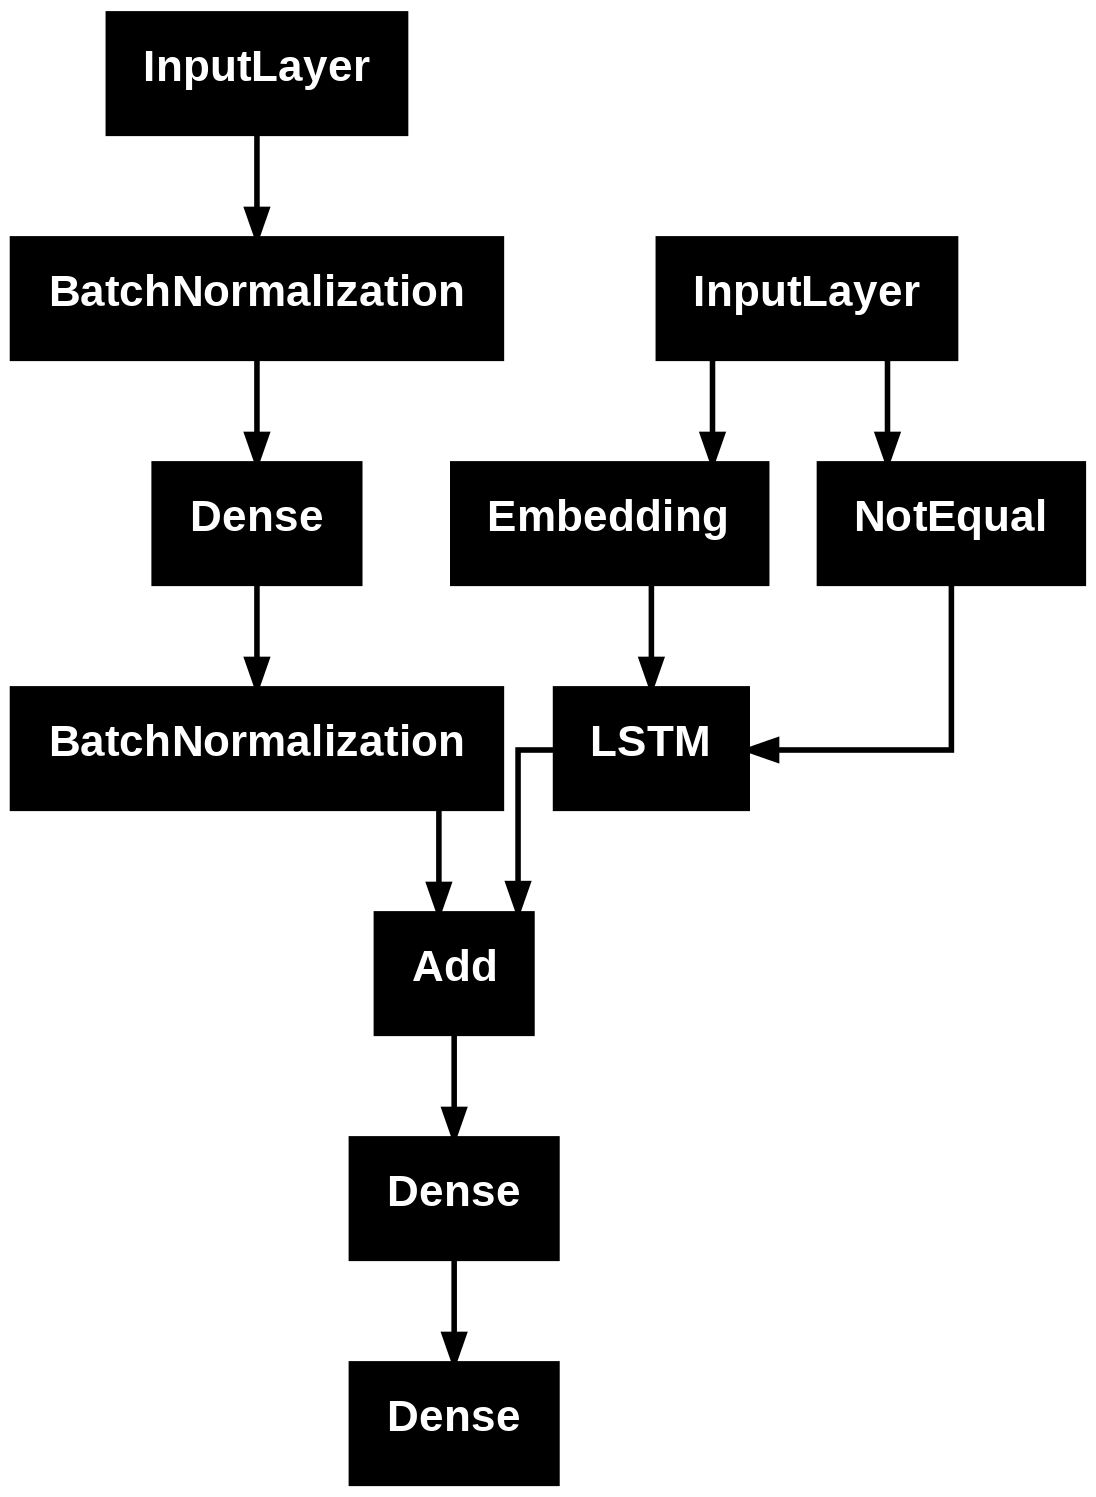

In [ ]:
plot_model(caption_model)

# Model training

Training is discontinued if there is no improvement in validation loss for 3 consecutive epochs.

In [ ]:
# Define an early stopping callback to prevent overtraining
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

def lr_scheduler(epoch, lr):
    return float(lr * tf.math.exp(-0.6))

# Learning rate scheduler
lr_schedule = LearningRateScheduler(lr_scheduler)

history = caption_model.fit(train_data_generator, steps_per_epoch=len(train_captions) // batch_size_train,
                        validation_data=val_data_generator, validation_steps=len(val_captions) // batch_size_val,
                        epochs=15, callbacks=[early_stopping, lr_schedule])

Epoch 1/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 963s 8s/step - loss: 4.9907 - val_loss: 3.5207 - learning_rate: 0.0055
Epoch 2/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 882s 7s/step - loss: 3.0045 - val_loss: 3.2136 - learning_rate: 0.0030
Epoch 3/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 861s 7s/step - loss: 2.5561 - val_loss: 3.1746 - learning_rate: 0.0017
Epoch 4/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 861s 7s/step - loss: 2.3121 - val_loss: 3.2034 - learning_rate: 9.0718e-04
Epoch 5/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 860s 7s/step - loss: 2.1485 - val_loss: 3.2143 - learning_rate: 4.9787e-04
Epoch 6/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 803s 6s/step - loss: 2.0688 - val_loss: 3.2685 - learning_rate: 2.7324e-04


# Visualization of learning outcomes

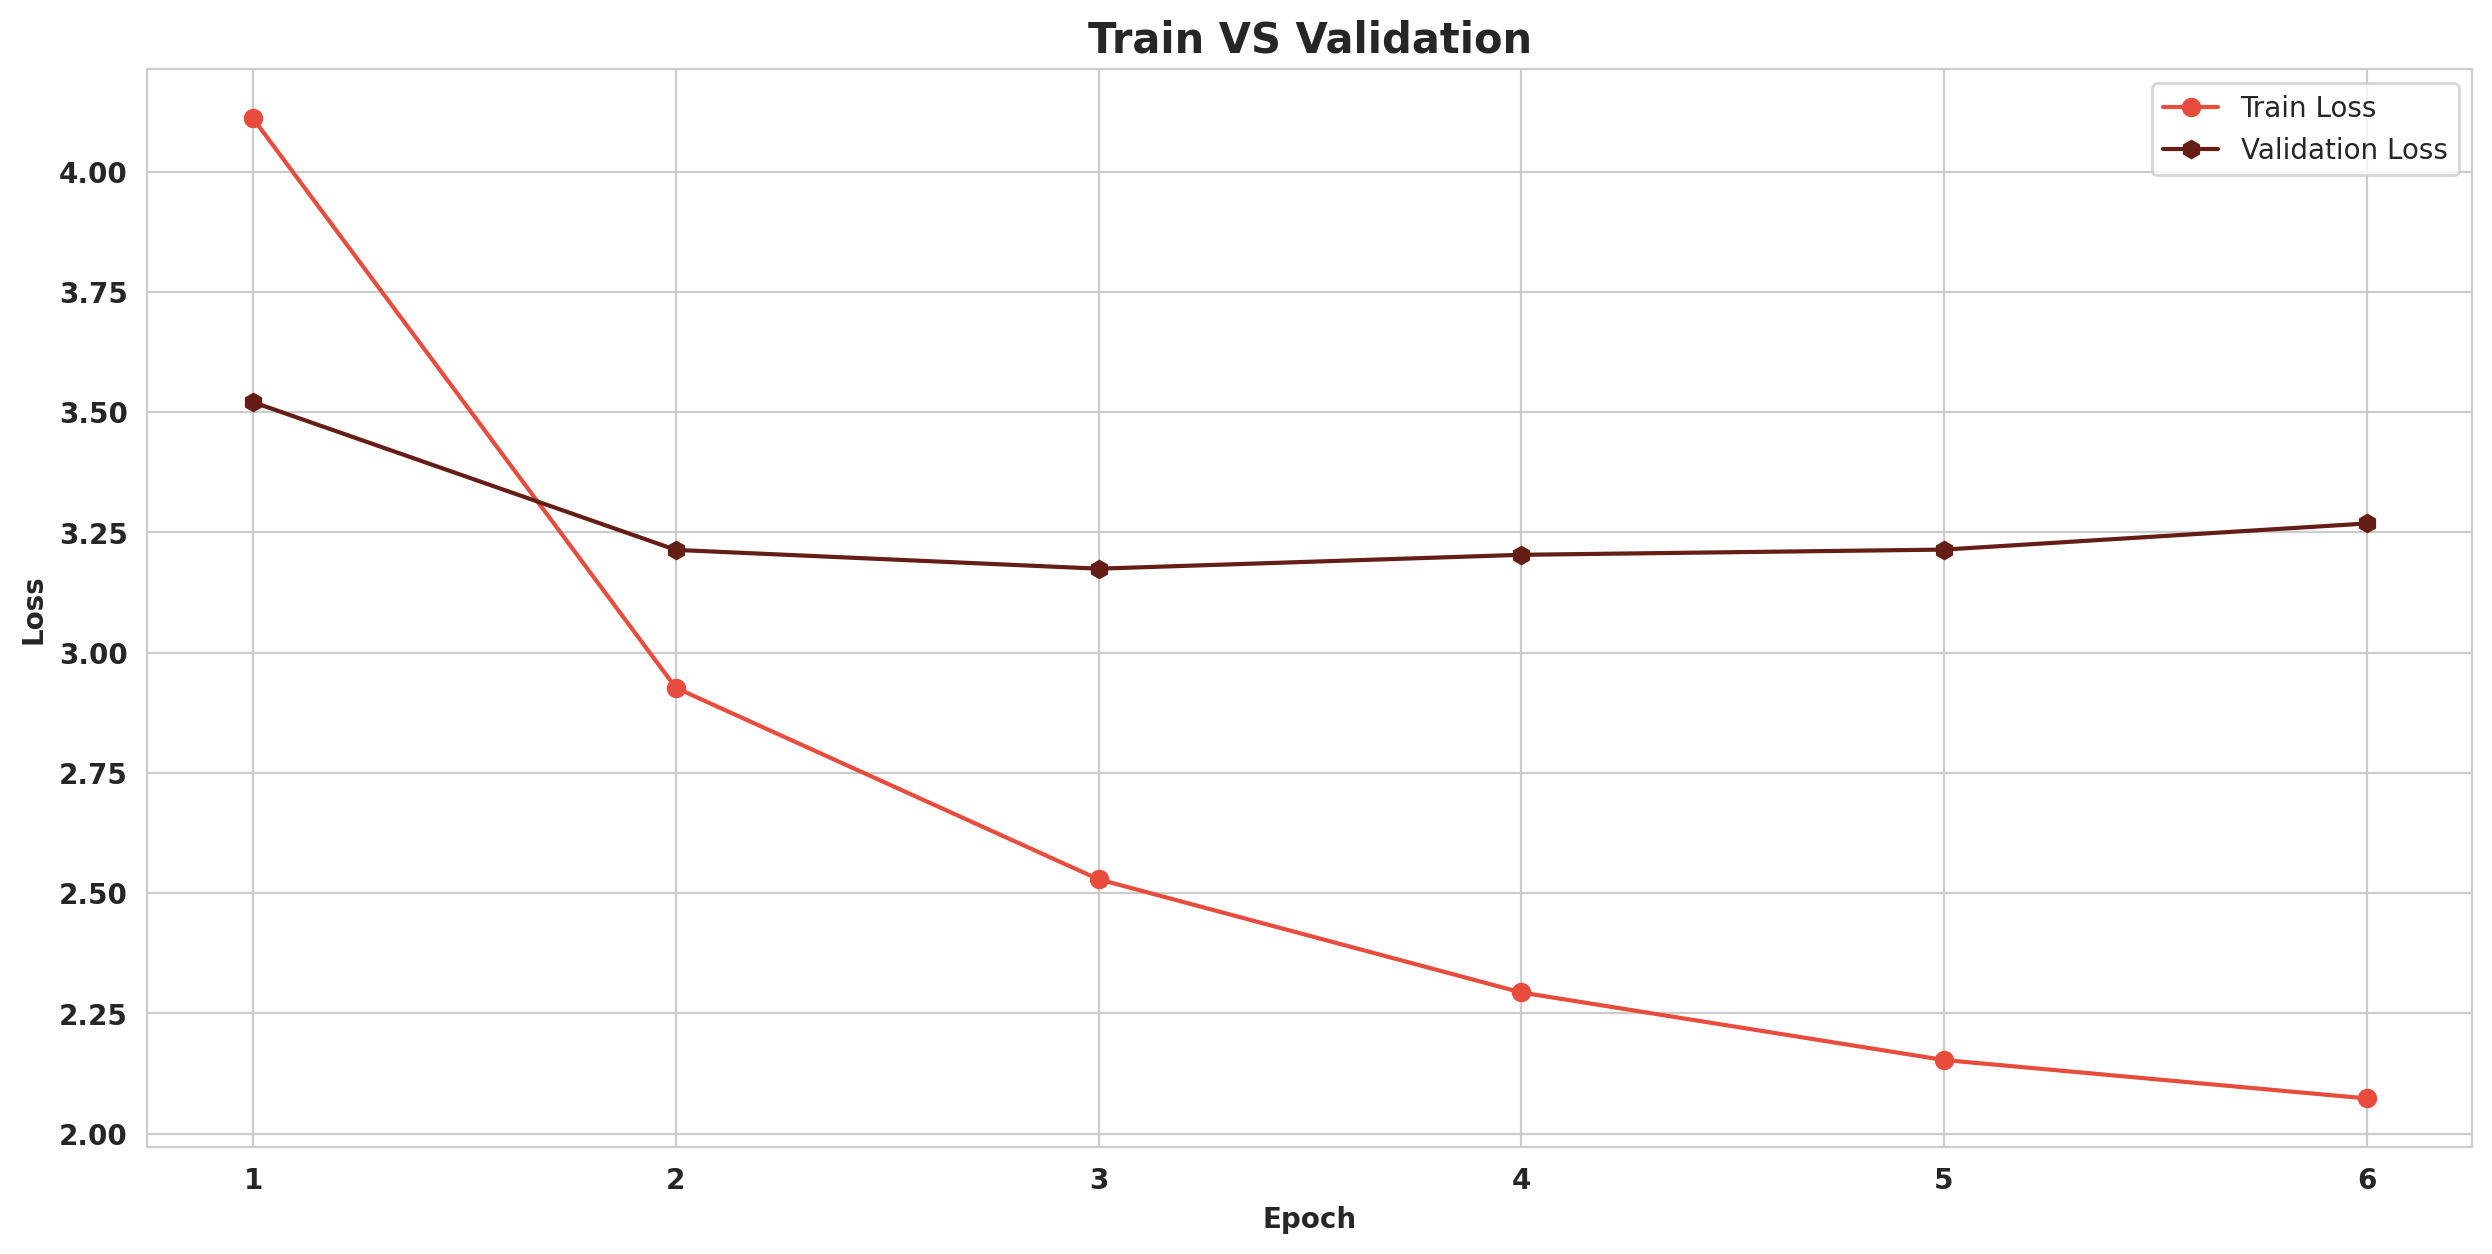

In [ ]:
plt.figure(figsize=(15, 7), dpi=200)
sns.set_style('whitegrid')
plt.plot([x+1 for x in range(len(history.history['loss']))], history.history['loss'], color='#E74C3C', marker='o')
plt.plot([x+1 for x in range(len(history.history['loss']))], history.history['val_loss'], color='#641E16', marker='h')
plt.title('Train VS Validation', fontsize=15, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('Epoch', fontweight='bold')
plt.ylabel('Loss', fontweight='bold')
plt.legend(['Train Loss', 'Validation Loss'], loc='best')
plt.show()

# Inference

* Caption Generation: at each time step, the model takes as input the image features along with the generated captions (starting from the beginning at the first time step), predicting the probabilities of the next word.

* Greedy algorithm: used to select the best signature. This method selects the most probable word at each time step and applies it to the generated labels until the selected word is ‘end’, or the length of the decoded vtnjr exceeds the maximum length of the sequence.

* Beam Search: this is an alternative to the Greedy algorithm for label selection. It contains a bundle of multiple hypotheses (label candidates) at each time step. At each time step, the model predicts the next word for each hypothesis. The top k candidates (based on probabilities) are stored in the bundle. The process continues until an ‘end’ is generated or the maximum sequence length is reached.

* Visualization: The visualization() function displays the images along with the corresponding predicted signatures accompanied by 2 BLEU scores.

The evaluation is performed using BLEU_score. BLEU is an algorithm for evaluating the quality of text that has been translated from one natural language to another. The BLEU algorithm compares consecutive phrases of the automatic translation with consecutive phrases it finds in the reference translation, and weightedly counts the number of matches. These matches are position independent. A higher match indicates a higher degree of similarity to the reference translation and a higher score. Clarity and grammar are not taken into account.

In [ ]:
def greedy_generator(image_features): # Function for creating captions
    # Each caption starts with the word 'start'
    in_text = 'start '
    for _ in range(max_caption_length):
    sequence = tokenizer.texts_to_sequences([in_text])[0]
    sequence = pad_sequences([sequence], maxlen=max_caption_length). reshape((1,max_caption_length))
    prediction = caption_model.predict([image_features.reshape(1,cnn_output_dim), sequence], verbose=0)
    idx = np.argmax(prediction)
    word = tokenizer.index_word[idx]
    # Adding the predicted word to the sequence
    in_text += ' ' + word
        # When the model returns the word ‘end’, the generation loop stops.
        if word == 'end':
            break

    in_text = in_text.replace('start ', '')
    in_text = in_text.replace(' end', '')

    return in_text

In [ ]:
def beam_search_generator(image_features, K_beams = 3, log = False):
    start = [tokenizer.word_index['start']]

    start_word = [[start, 0.0]]

    for _ in range(max_caption_length):
        temp = []
        for s in start_word:
            # Sequence of most likely words based on previous steps
            sequence = pad_sequences([s[0]], maxlen=max_caption_length).reshape((1, max_caption_length))

            preds = caption_model.predict([image_features.reshape(1,cnn_output_dim), sequence], verbose=0)

            # Sort the predictions by probability and select the last elements K_beams
            word_preds = np.argsort(preds[0])[-K_beams:].

            # Retrieve the top <K_beams>(n) predictions and create a new list to run them through the model again
            for w in word_preds:

                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                if log:
                    prob += np.log(preds[0][w]) # assigning a probability for each of the K words
                else:
                    prob += preds[0][w]
                    temp.append([next_cap, prob])

        start_word = temp
        # Sorting by probability
        start_word = sorted(start_word, reverse=False, key=lambda l: l[1])

        # Getting the top words
        start_word = start_word[-K_beams:]

    start_word = start_word[-1][0]
    captions_ = [tokenizer.index_word[i] for i in start_word]

    final_caption = []

    for i in captions_:
        if i != 'end':
            final_caption.append(i)
        else:
            break

    final_caption = ' '.join(final_caption[1:])
    return final_caption

In [ ]:
# Calculating the BLEU score
def BLEU_score(actual, greedy, beam_search):
    # Comparison of predicted labels with 5 actual labels
    score_greedy_1 = corpus_bleu(actual, greedy, weights=(0.3, 0.3, 0.3, 0))
    score_greedy_2 = corpus_bleu(actual, greedy, weights=(0.25, 0.25, 0.25, 0.25))
    score_BS_1 = corpus_bleu(actual, beam_search, weights=(0.3, 0.3, 0.3, 0))
    score_BS_2 = corpus_bleu(actual, beam_search, weights=(0.25, 0.25, 0.25, 0.25))

    return [
        (f'BLEU-2 Greedy: {round(score_BS_2, 5)}'),
        (f'BLEU-1 Greedy: {round(score_BS_1, 5)}'),
        (f'Greedy: {greedy[0]}'),
        (f'BLEU-2 Beam Search: {round(score_greedy_2, 5)}'),
        (f'BLEU-1 Beam Search: {round(score_greedy_1, 5)}'),
        (f'Beam Search:  {beam_search[0]}')
    ]

In [ ]:
# Dictionary to access the actual captions for each image by image ID
test_actual_captions = {}
for item in test_captions:
    image_id, caption = item.split('\t')
    if image_id not in test_actual_captions:
        test_actual_captions[image_id] = []
    test_actual_captions[image_id].append(caption)

In [ ]:
# Signature generation
generated_captions = {}

pbar = tqdm_notebook(total=len(test_image_features), position=0, leave=True, colour='green')
for image_id in test_image_features:
    cap = greedy_generator(test_image_features[image_id])
    generated_captions[image_id] = cap
    pbar.update(1)

pbar.close()

# Visualization of some test images with corresponding generated captions

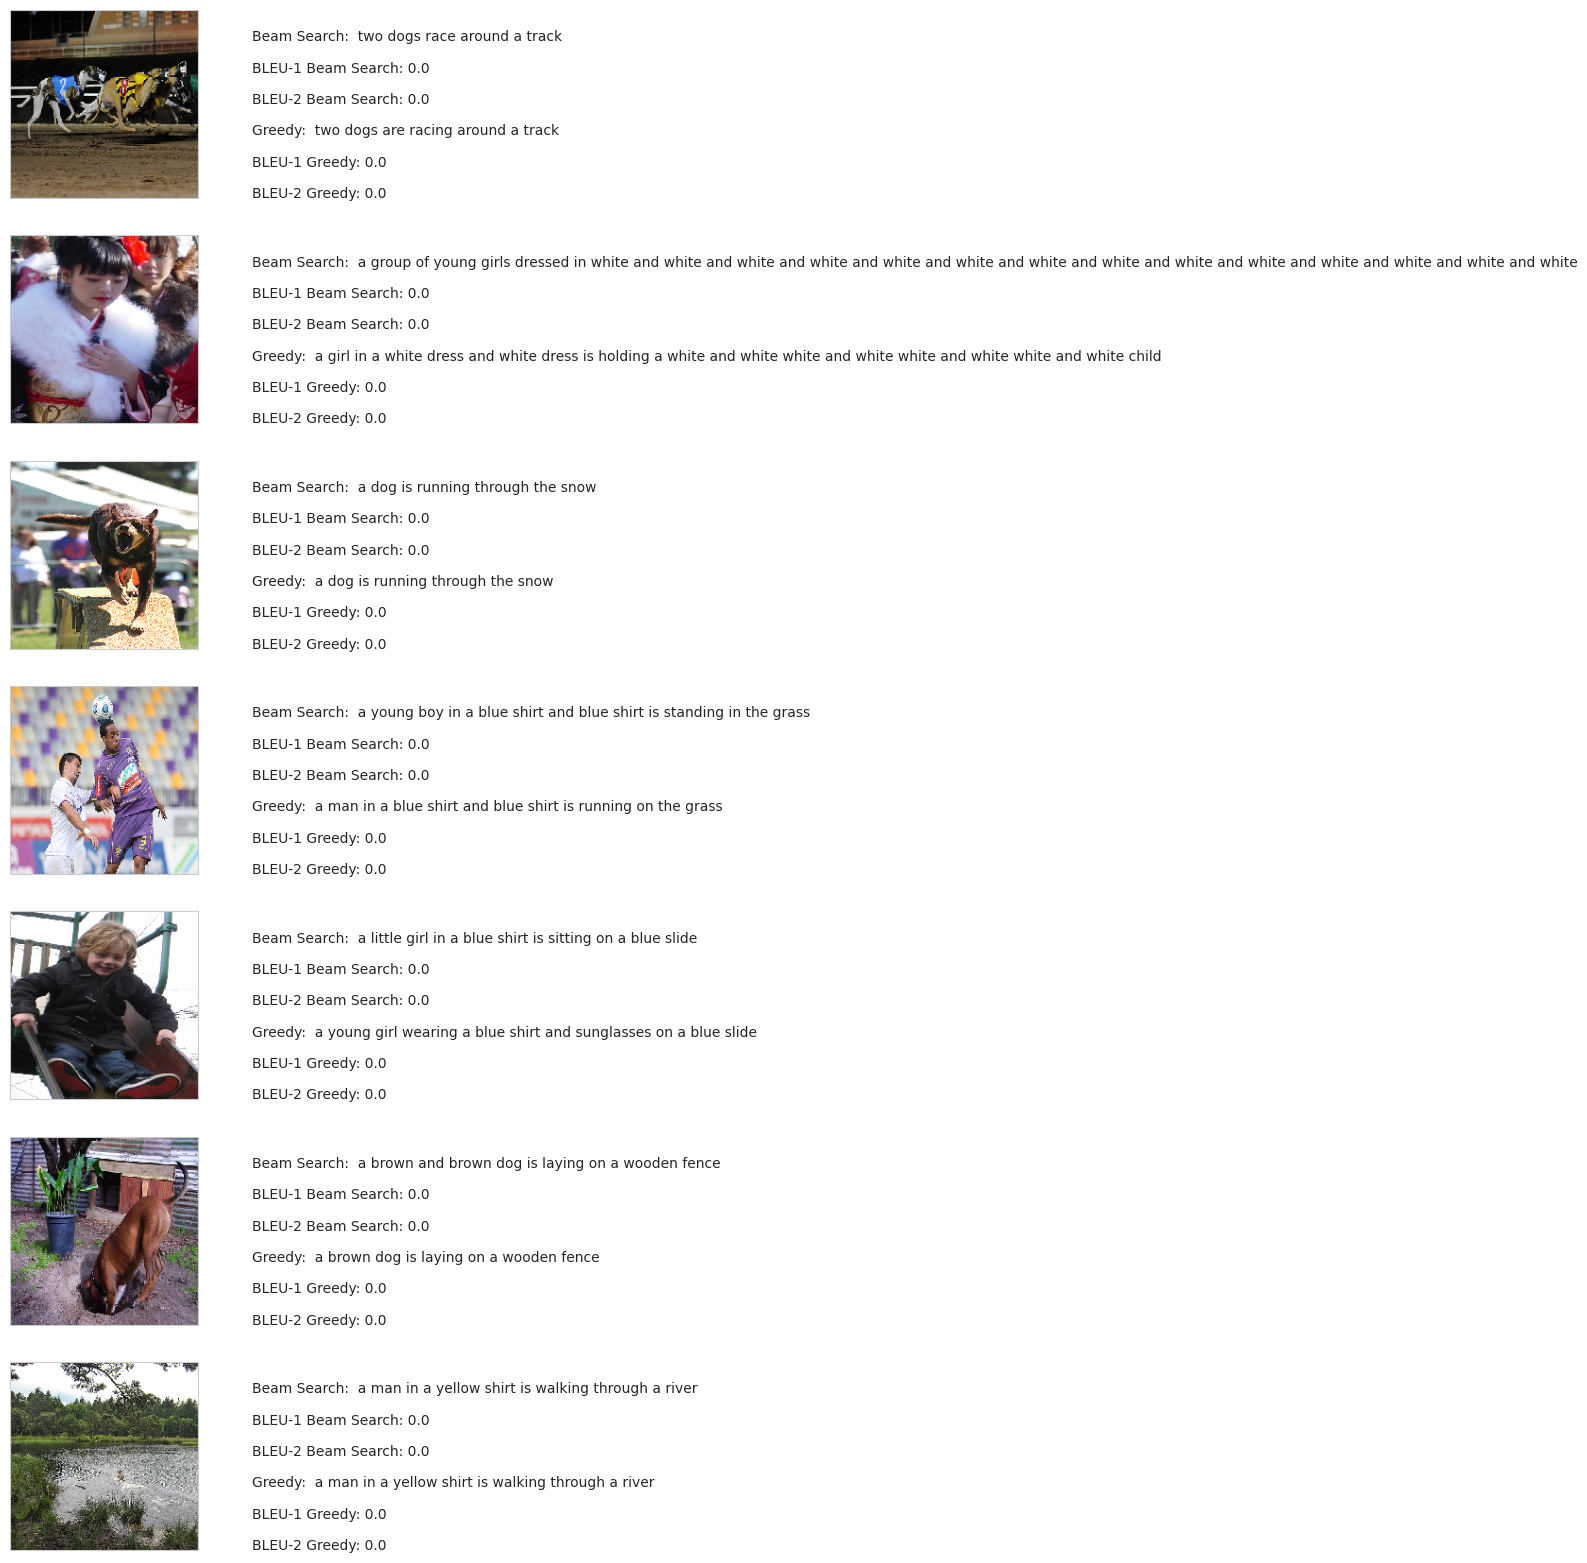

In [ ]:
def visualization_test(data, greedy_caps, beamS_generator, evaluator, num_of_images):
    keys = list(data.keys()) # List of all test images
    images = [np.random.choice(keys) for i in range(num_of_images)] # Randomly selected images

    count = 1
    fig = plt.figure(figsize=(6,20))
    for filename in images:
        actual_cap = data[filename]
        actual_cap = [x.replace("start ", "") for x in actual_cap] # Remove the 'start' token
        actual_cap = [x.replace(" end", "") for x in actual_cap] # Remove the 'end' token

        # Generate tags
        greedy_cap = greedy_caps[filename]
        beamS_cap = beamS_generator(test_image_features[filename])

        # Get BLEU score
        caps_with_score = evaluator(actual_cap, [greedy_cap]*(len(actual_cap)), [beamS_cap]*(len(actual_cap)))

        image_load = load_img(images_directory+filename, target_size=(199,199,3))
        ax = fig.add_subplot(num_of_images,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        count += 1

        ax = fig.add_subplot(num_of_images,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,len(caps_with_score))
        for i, text in enumerate(caps_with_score):
            ax.text(0,i,text,fontsize=10)
        count += 1
    plt.show()

visualization_test(test_actual_captions, generated_captions, beam_search_generator, BLEU_score, 7)

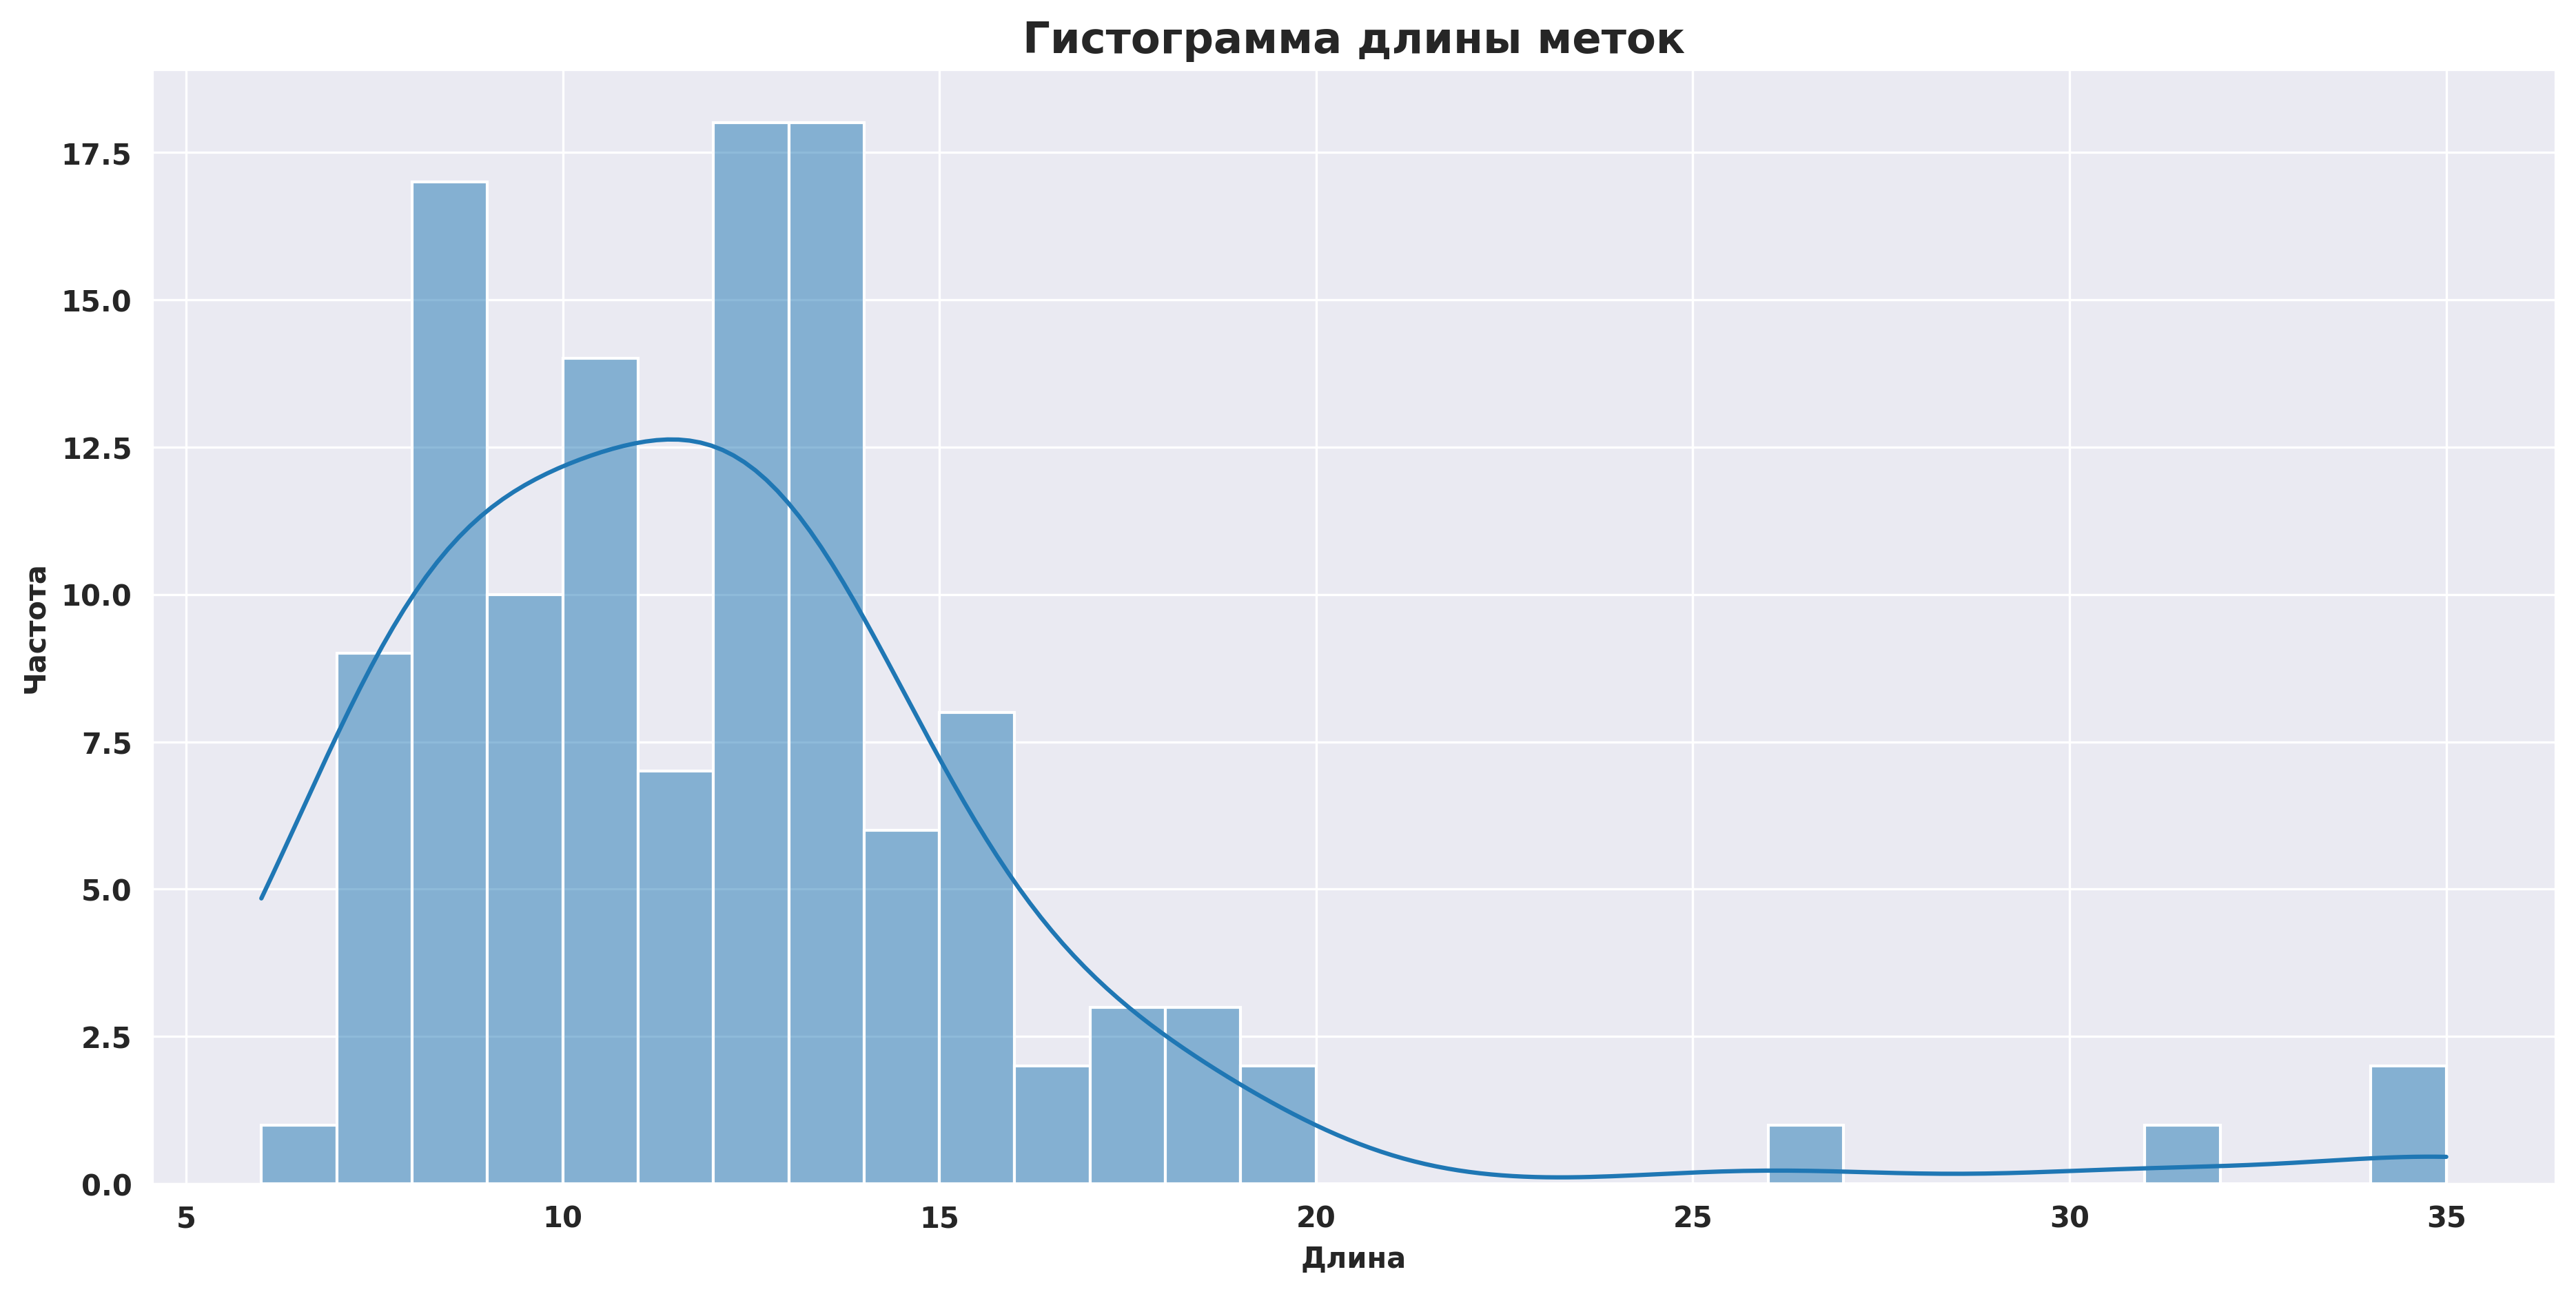

In [ ]:
captions_length(list(generated_captions.values()))

In [ ]:
word_occurrences(list(generated_captions.values()))